In [9]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
gas = pd.read_csv("data/온실가스양데이터_전처리.csv").drop(['Unnamed: 0'], axis=1)
gas

,날짜,평균 이산화탄소(CO2) 배경대기농도(ppm)
0,2017-01,413.500000
1,2017-02,414.500000
2,2017-03,415.800000
3,2017-04,416.300000
4,2017-05,415.200000
5,2017-06,412.100000
6,2017-07,408.000000
7,2017-08,405.100000
8,2017-09,406.100000
9,2017-10,410.300000


In [11]:
gas['연도'] = gas.날짜.str.split('-').str[0]
gas['월'] = gas.날짜.str.split('-').str[1]

In [12]:
gas.drop(['날짜'], axis=1, inplace=True)

In [13]:
gas['연도'] = gas['연도'].astype(int)

In [6]:
gas.info()
gas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   평균 이산화탄소(CO2) 배경대기농도(ppm)  55 non-null     float64
 1   연도                         55 non-null     int32  
 2   월                          55 non-null     object 
dtypes: float64(1), int32(1), object(1)
memory usage: 1.2+ KB


,평균 이산화탄소(CO2) 배경대기농도(ppm),연도,월
0,413.500000,2017,01
1,414.500000,2017,02
2,415.800000,2017,03
3,416.300000,2017,04
4,415.200000,2017,05
5,412.100000,2017,06
6,408.000000,2017,07
7,405.100000,2017,08
8,406.100000,2017,09
9,410.300000,2017,10


In [17]:
elect = pd.read_csv("data/전력수급_월별평균최대전력.csv", encoding='cp949')
elect

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2023,79463,76183,68151,65210,0,0,0,0,0,0,0,0
1,2022,79797,77278,71145,66096,66243,71805,82007,80375,70674,66443,68926,82176
2,2021,77620,72010,67268,63917,63388,68857,81158,77300,69327,67052,70028,78180
3,2020,72980,71955,65529,61320,59098,66800,68877,76952,67542,63088,67184,75851
4,2019,77943,72266,67921,65096,63716,66376,74481,77699,68403,64446,66970,73705
5,2018,78964,76149,68813,64055,64337,68127,79038,80710,66413,65070,68469,75613
6,2017,73183,73898,68249,61887,62302,67071,75838,74083,67696,61631,69196,76423
7,2016,73545,69910,66582,60977,61390,66208,71773,74996,64635,62347,66712,72279
8,2015,71533,68475,66488,61826,59491,64649,68341,69103,63130,61068,63772,70136
9,2014,69421,68346,64621,60480,59656,62792,68873,64257,61390,60616,63332,72785


In [18]:
elect = pd.melt(elect, id_vars=['연도'],var_name='월', value_name='전력사용량')
elect

,연도,월,전력사용량
0,2023,1월,79463
1,2022,1월,79797
2,2021,1월,77620
3,2020,1월,72980
4,2019,1월,77943
...,...,...,...
367,1997,12월,0
368,1996,12월,0
369,1995,12월,0
370,1994,12월,0


In [19]:
elect = elect.replace(['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'],['01','02','03','04','05','06','07','08','09','10','11','12'])
elect = elect.sort_values(by=['연도', '월'], ascending=True)
elect = elect[(elect['연도'] >= 2017) & (elect['연도'] <= 2021)]
elect = elect.reset_index(drop=True)
elect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      60 non-null     int64 
 1   월       60 non-null     object
 2   전력사용량   60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [20]:
co2_elect =  pd.merge(gas, elect, on=['연도','월'], how='left')

In [22]:
co2_elect

,평균 이산화탄소(CO2) 배경대기농도(ppm),연도,월,전력사용량
0,413.500000,2017,01,73183
1,414.500000,2017,02,73898
2,415.800000,2017,03,68249
3,416.300000,2017,04,61887
4,415.200000,2017,05,62302
5,412.100000,2017,06,67071
6,408.000000,2017,07,75838
7,405.100000,2017,08,74083
8,406.100000,2017,09,67696
9,410.300000,2017,10,61631


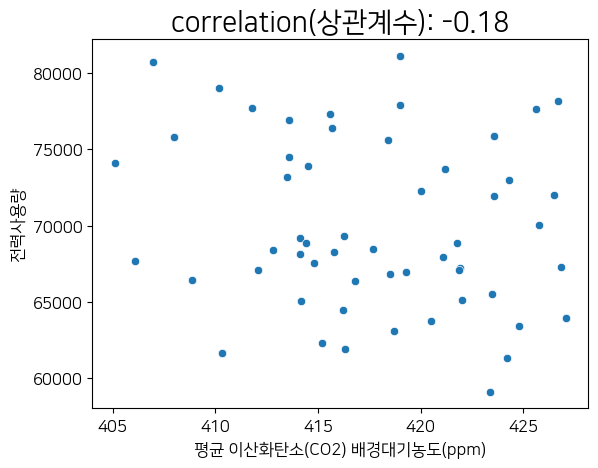

In [23]:
correlation = co2_elect['전력사용량'].corr(co2_elect['평균 이산화탄소(CO2) 배경대기농도(ppm)'])
sns.scatterplot(x=co2_elect['평균 이산화탄소(CO2) 배경대기농도(ppm)'], y=co2_elect['전력사용량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("평균 이산화탄소(CO2) 배경대기농도(ppm)",fontsize=12)
plt.ylabel("전력사용량",fontsize=12)
plt.show()

In [106]:
gas['월'] = gas['월'].astype(int)

In [87]:
monelect = pd.read_csv('data/17_21월별전력.csv', encoding='cp949')

In [88]:
monelect.dropna(inplace=True)

In [89]:
monelect['날짜'] =  monelect['날짜'].str.replace('\t\t\t','')

In [90]:
monelect[['연도', '월']] = monelect['날짜'].str.split('-', expand=True)
monelect = monelect.drop([12, 13, 14, 15, 16], axis=0).reset_index(drop=True)

In [91]:
# monelect.dropna(inplace=True)
monelect

,날짜,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃),연도,월
0,2017-01,108.0,-1.8,-5.8,2.9,2017,01
1,2017-02,108.0,-0.2,-4.7,4.8,2017,02
2,2017-03,108.0,6.3,1.7,12.3,2017,03
3,2017-04,108.0,13.9,9.1,20.0,2017,04
4,2017-05,108.0,19.5,14.4,25.4,2017,05
5,2017-06,108.0,23.3,18.7,28.8,2017,06
6,2017-07,108.0,26.9,24.3,30.4,2017,07
7,2017-08,108.0,25.9,22.9,29.7,2017,08
8,2017-09,108.0,22.1,17.5,27.4,2017,09
9,2017-10,108.0,16.4,11.6,22.5,2017,10


In [92]:
monelect.drop(['날짜'], axis=1, inplace=True)

In [102]:
monelect[['연도', '월']] = monelect[['연도', '월']].astype(int)

In [103]:
monelect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         55 non-null     float64
 1   평균기온(℃)    55 non-null     float64
 2   평균최저기온(℃)  55 non-null     float64
 3   평균최고기온(℃)  55 non-null     float64
 4   연도         55 non-null     int32  
 5   월          55 non-null     int32  
dtypes: float64(4), int32(2)
memory usage: 2.3 KB


In [108]:
tem_co2 = pd.merge(gas, monelect, on=['연도','월'], how='left')

In [113]:
tem_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   평균 이산화탄소(CO2) 배경대기농도(ppm)  55 non-null     float64
 1   연도                         55 non-null     int32  
 2   월                          55 non-null     int32  
 3   지점                         55 non-null     float64
 4   평균기온(℃)                    55 non-null     float64
 5   평균최저기온(℃)                  55 non-null     float64
 6   평균최고기온(℃)                  55 non-null     float64
dtypes: float64(5), int32(2)
memory usage: 2.7 KB


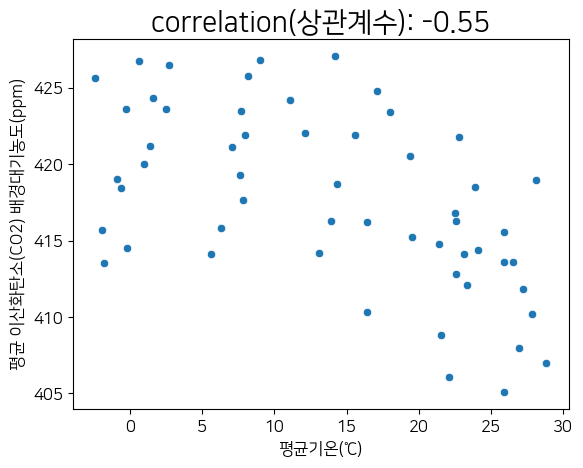

In [115]:
correlation = tem_co2['평균기온(℃)'].corr(tem_co2['평균 이산화탄소(CO2) 배경대기농도(ppm)'])
sns.scatterplot(x=tem_co2['평균기온(℃)'], y=tem_co2['평균 이산화탄소(CO2) 배경대기농도(ppm)'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("평균기온(℃)",fontsize=12)
plt.ylabel("평균 이산화탄소(CO2) 배경대기농도(ppm)",fontsize=12)
plt.show()

In [116]:
## 여름철에는 대기 중 이산화탄소 농도가 낮아지는 경향이 있습니다. 
## 이유는 여름철에는 식물들이 광합성을 하면서 대기 중 이산화탄소를 흡수하기 때문입니다. 
## 또한 여름철에는 온도가 높아져서 대기 중 이산화탄소가 해수로 더 잘 녹아들어가기 때문에 대기 중 이산화탄소 농도가 낮아집니다